# Dissatisfaction in Employee Exit Surveys#

In this project, we'll work with exit surveys from employees of two departments, the Department of Education, Training and Employment (DETE) and the Technical and Further Education (TAFE) institute in Queensland, Australia.

We are going to find answers to the following questions by cleaning and analysing the combined data from both surveys: 

1. **Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?**
2. **Are younger employees resigning due to some kind of dissatisfaction? What about older employees?**

Below is a preview of a couple columns we'll work with from the ***dete_survey.csv***:

- **ID**: An id used to identify the participant of the survey
- **SeparationType**: The reason why the person's employment ended
- **Cease Date**: The year or month the person's employment ended
- **DETE Start Date**: The year the person began employment with the DETE

Below is a preview of a couple columns we'll work with from the ***tafe_survey.csv***:

- **Record ID**: An id used to identify the participant of the survey
- **Reason for ceasing employment**: The reason why the person's employment ended
- **LengthofServiceOverall. Overall Length of Service at Institute (in years)**:  The length of the person's employment (in years)

## Import libraries and read files ##
We are going to use pandas and NumPy libraries and read the surveys files:

In [1]:
import pandas as pd
import numpy as np

In [2]:
dete_survey = pd.read_csv("dete_survey.csv")
tafe_survey = pd.read_csv("tafe_survey.csv")

Let's look at the data:

In [3]:
dete_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 822 entries, 0 to 821
Data columns (total 56 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   822 non-null    int64 
 1   SeparationType                       822 non-null    object
 2   Cease Date                           822 non-null    object
 3   DETE Start Date                      822 non-null    object
 4   Role Start Date                      822 non-null    object
 5   Position                             817 non-null    object
 6   Classification                       455 non-null    object
 7   Region                               822 non-null    object
 8   Business Unit                        126 non-null    object
 9   Employment Status                    817 non-null    object
 10  Career move to public sector         822 non-null    bool  
 11  Career move to private sector        822 non-

In [4]:
tafe_survey.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 72 columns):
 #   Column                                                                                                                                                         Non-Null Count  Dtype  
---  ------                                                                                                                                                         --------------  -----  
 0   Record ID                                                                                                                                                      702 non-null    float64
 1   Institute                                                                                                                                                      702 non-null    object 
 2   WorkArea                                                                                                                                  

In [5]:
dete_survey.head(5)

,ID,SeparationType,Cease Date,DETE Start Date,Role Start Date,Position,Classification,Region,Business Unit,Employment Status,...,Kept informed,Wellness programs,Health & Safety,Gender,Age,Aboriginal,Torres Strait,South Sea,Disability,NESB
0,1,Ill Health Retirement,08/2012,1984,2004,Public Servant,A01-A04,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,Yes
1,2,Voluntary Early Retirement (VER),08/2012,Not Stated,Not Stated,Public Servant,AO5-AO7,Central Office,Corporate Strategy and Peformance,Permanent Full-time,...,N,N,N,Male,56-60,NaN,NaN,NaN,NaN,NaN
2,3,Voluntary Early Retirement (VER),05/2012,2011,2011,Schools Officer,NaN,Central Office,Education Queensland,Permanent Full-time,...,N,N,N,Male,61 or older,NaN,NaN,NaN,NaN,NaN
3,4,Resignation-Other reasons,05/2012,2005,2006,Teacher,Primary,Central Queensland,NaN,Permanent Full-time,...,A,N,A,Female,36-40,NaN,NaN,NaN,NaN,NaN
4,5,Age Retirement,05/2012,1970,1989,Head of Curriculum/Head of Special Education,NaN,South East,NaN,Permanent Full-time,...,N,A,M,Female,61 or older,NaN,NaN,NaN,NaN,NaN


In [6]:
tafe_survey.head(4)

,Record ID,Institute,WorkArea,CESSATION YEAR,Reason for ceasing employment,Contributing Factors. Career Move - Public Sector,Contributing Factors. Career Move - Private Sector,Contributing Factors. Career Move - Self-employment,Contributing Factors. Ill Health,Contributing Factors. Maternity/Family,...,Workplace. Topic:Does your workplace promote a work culture free from all forms of unlawful discrimination?,Workplace. Topic:Does your workplace promote and practice the principles of employment equity?,Workplace. Topic:Does your workplace value the diversity of its employees?,Workplace. Topic:Would you recommend the Institute as an employer to others?,Gender. What is your Gender?,CurrentAge. Current Age,Employment Type. Employment Type,Classification. Classification,LengthofServiceOverall. Overall Length of Service at Institute (in years),LengthofServiceCurrent. Length of Service at current workplace (in years)
0,6.341330e+17,Southern Queensland Institute of TAFE,Non-Delivery (corporate),2010.0,Contract Expired,NaN,NaN,NaN,NaN,NaN,...,Yes,Yes,Yes,Yes,Female,26 30,Temporary Full-time,Administration (AO),1-2,1-2
1,6.341337e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
2,6.341388e+17,Mount Isa Institute of TAFE,Delivery (teaching),2010.0,Retirement,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN
3,6.341399e+17,Mount Isa Institute of TAFE,Non-Delivery (corporate),2010.0,Resignation,-,-,-,-,-,...,Yes,Yes,Yes,Yes,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
dete_survey["Employment Status"].value_counts(dropna = False)

Permanent Full-time    434
Permanent Part-time    308
Temporary Full-time     41
Temporary Part-time     24
Casual                  10
NaN                      5
Name: Employment Status, dtype: int64

In [8]:
dete_survey["Age"].value_counts(dropna = False)

61 or older      222
56-60            174
51-55            103
46-50             63
41-45             61
26-30             57
36-40             51
21-25             40
31-35             39
NaN               11
20 or younger      1
Name: Age, dtype: int64

In [9]:
tafe_survey['Employment Type. Employment Type'].value_counts(dropna = False)

Permanent Full-time    237
Temporary Full-time    177
NaN                    106
Contract/casual         71
Permanent Part-time     59
Temporary Part-time     52
Name: Employment Type. Employment Type, dtype: int64

In [10]:
tafe_survey['CurrentAge. Current Age'].value_counts(dropna = False)

56 or older      162
NaN              106
51-55             82
41  45            80
46  50            59
31  35            52
36  40            51
26  30            50
21  25            44
20 or younger     16
Name: CurrentAge. Current Age, dtype: int64

In [11]:
dete_survey.isnull().sum()

ID                                       0
SeparationType                           0
Cease Date                               0
DETE Start Date                          0
Role Start Date                          0
Position                                 5
Classification                         367
Region                                   0
Business Unit                          696
Employment Status                        5
Career move to public sector             0
Career move to private sector            0
Interpersonal conflicts                  0
Job dissatisfaction                      0
Dissatisfaction with the department      0
Physical work environment                0
Lack of recognition                      0
Lack of job security                     0
Work location                            0
Employment conditions                    0
Maternity/family                         0
Relocation                               0
Study/Travel                             0
Ill Health 

In [12]:
tafe_survey.isnull().sum()

Record ID                                                                      0
Institute                                                                      0
WorkArea                                                                       0
CESSATION YEAR                                                                 7
Reason for ceasing employment                                                  1
                                                                            ... 
CurrentAge. Current Age                                                      106
Employment Type. Employment Type                                             106
Classification. Classification                                               106
LengthofServiceOverall. Overall Length of Service at Institute (in years)    106
LengthofServiceCurrent. Length of Service at current workplace (in years)    106
Length: 72, dtype: int64

By looking at the above information we have figured out the following  issues:

1. The dete_survey dataframe contains 'Not Stated' values that indicate values are missing, but they aren't represented as NaN.
2. Both data frames contain many columns that we don't need for our analysis.
3. The column names are different that are needed to get unified
4. There are multiple columns/answers that indicate an employee resigned because they were dissatisfied.

To solve the above issues we are going to start data cleaning.

## Data cleaning##

### Read 'Not stated'as Nan

To change 'Not stated' to 'Nan', we can read the file again by setting na_values parameter.

In [13]:
dete_survey = pd.read_csv("dete_survey.csv", na_values = "Not Stated")

### Delete not required columns

We can delete the columns from both dataframes that won't be used in our analysis.

In [14]:
dete_survey_updated = dete_survey.drop(dete_survey.columns[28:49], axis = 1)

In [15]:
tafe_survey_updated = tafe_survey.drop(tafe_survey.columns[17:66], axis = 1)

### Correction of the Columns' names: 

Looking at the column names we are going to use the following criteria to update the column names:

- Make all the capitalization lowercase.
- Remove any trailing whitespace from the end of the strings.
- Replace spaces with underscores ('_').

These criteria are applied to **dete**.

In [16]:
dete_survey_updated.columns = dete_survey_updated.columns.str.lower().str.strip().str.replace(' ', '_')

In [17]:
print(dete_survey_updated.columns)

Index(['id', 'separationtype', 'cease_date', 'dete_start_date',
       'role_start_date', 'position', 'classification', 'region',
       'business_unit', 'employment_status', 'career_move_to_public_sector',
       'career_move_to_private_sector', 'interpersonal_conflicts',
       'job_dissatisfaction', 'dissatisfaction_with_the_department',
       'physical_work_environment', 'lack_of_recognition',
       'lack_of_job_security', 'work_location', 'employment_conditions',
       'maternity/family', 'relocation', 'study/travel', 'ill_health',
       'traumatic_incident', 'work_life_balance', 'workload',
       'none_of_the_above', 'gender', 'age', 'aboriginal', 'torres_strait',
       'south_sea', 'disability', 'nesb'],
      dtype='object')


Some columns' names are so long and we need to rename them in **tafe**:

In [18]:
tafe_survey_updated.rename(columns = {'Record ID': 'id',
        'CESSATION YEAR': 'cease_date',
        'Reason for ceasing employment': 'separationtype',
        'Gender. What is your Gender?': 'gender', 
        'CurrentAge. Current Age': 'age',
        'Employment Type. Employment Type': 'employment_status',
        'Classification. Classification': 'position', 
        'LengthofServiceOverall. Overall Length of Service at Institute (in years)': 'institute_service',
        'LengthofServiceCurrent. Length of Service at current workplace (in years)': 'role_service'},
        inplace = True)
print(tafe_survey_updated.columns)

Index(['id', 'Institute', 'WorkArea', 'cease_date', 'separationtype',
       'Contributing Factors. Career Move - Public Sector ',
       'Contributing Factors. Career Move - Private Sector ',
       'Contributing Factors. Career Move - Self-employment',
       'Contributing Factors. Ill Health',
       'Contributing Factors. Maternity/Family',
       'Contributing Factors. Dissatisfaction',
       'Contributing Factors. Job Dissatisfaction',
       'Contributing Factors. Interpersonal Conflict',
       'Contributing Factors. Study', 'Contributing Factors. Travel',
       'Contributing Factors. Other', 'Contributing Factors. NONE', 'gender',
       'age', 'employment_status', 'position', 'institute_service',
       'role_service'],
      dtype='object')


**Extract Resignated employees**

Our goal is to answer this question:
- Are employees who only worked for the institutes for a short period of time **resigning** due to some kind of dissatisfaction? What about employees who have been there longer?

So we are going to look at **separationtype** column in both dataframes and look at the data that the separation type contains **'Resignation'**

In [19]:
dete_survey_updated['separationtype'].value_counts(dropna = False)

Age Retirement                          285
Resignation-Other reasons               150
Resignation-Other employer               91
Resignation-Move overseas/interstate     70
Voluntary Early Retirement (VER)         67
Ill Health Retirement                    61
Other                                    49
Contract Expired                         34
Termination                              15
Name: separationtype, dtype: int64

In [20]:
tafe_survey_updated['separationtype'].value_counts(dropna = False)

Resignation                 340
Contract Expired            127
Retrenchment/ Redundancy    104
Retirement                   82
Transfer                     25
Termination                  23
NaN                           1
Name: separationtype, dtype: int64

In [21]:
dete_resignations = dete_survey_updated[dete_survey_updated['separationtype'].str.contains('Resignation')].copy()
tafe_resignations = tafe_survey_updated.loc[tafe_survey_updated['separationtype'].str.contains('Resignation', na = False)].copy()


Two new dataframes have been created that only contains data when separationtype is a kind of **Resignation**. Those dataframes are **dete_resignations** and **tafe_resignations**

## Data Verification##

We need also to check if data we want to use is corrupted. We start checking **cease_date** and **dete_start_date** in dete. cease date must be after start date and start date can not be before 1940.

looking at the **cease_date** column, we figure out that it needs to be cleaned. Some dates are only year while the others contain months.

In [22]:
dete_resignations['cease_date'].value_counts(dropna = False)

2012       126
2013        74
01/2014     22
12/2013     17
06/2013     14
09/2013     11
NaN         11
11/2013      9
07/2013      9
10/2013      6
08/2013      4
05/2012      2
05/2013      2
07/2006      1
09/2010      1
07/2012      1
2010         1
Name: cease_date, dtype: int64

Year is sufficient for the cease_date so we extract Year from cease_date and save it **cease_year** column:

In [23]:
dete_resignations['cease_year'] = dete_resignations['cease_date'].str.extract(
    r'(?P<Month>[0-1])?/?(?P<Year>[0-9]{4})', expand=True)['Year'].astype(float)

In [24]:
dete_resignations['cease_year'].value_counts(dropna = False).sort_index(ascending = True)

2006.0      1
2010.0      2
2012.0    129
2013.0    146
2014.0     22
NaN        11
Name: cease_year, dtype: int64

In [25]:
tafe_resignations['cease_date'].value_counts(dropna = False).sort_index(ascending = True)

2009.0      2
2010.0     68
2011.0    116
2012.0     94
2013.0     55
NaN         5
Name: cease_date, dtype: int64

Let's Look at dete_start_date and verify that all start dates are before cease dates.

In [26]:
dete_resignations['dete_start_date'].value_counts(dropna = False).sort_index(ascending = True)

1963.0     1
1971.0     1
1972.0     1
1973.0     1
1974.0     2
1975.0     1
1976.0     2
1977.0     1
1980.0     5
1982.0     1
1983.0     2
1984.0     1
1985.0     3
1986.0     3
1987.0     1
1988.0     4
1989.0     4
1990.0     5
1991.0     4
1992.0     6
1993.0     5
1994.0     6
1995.0     4
1996.0     6
1997.0     5
1998.0     6
1999.0     8
2000.0     9
2001.0     3
2002.0     6
2003.0     6
2004.0    14
2005.0    15
2006.0    13
2007.0    21
2008.0    22
2009.0    13
2010.0    17
2011.0    24
2012.0    21
2013.0    10
NaN       28
Name: dete_start_date, dtype: int64

In [27]:
dete_resignations[dete_resignations['cease_year'] < dete_resignations['dete_start_date']]

,id,separationtype,cease_date,dete_start_date,role_start_date,position,classification,region,business_unit,employment_status,...,workload,none_of_the_above,gender,age,aboriginal,torres_strait,south_sea,disability,nesb,cease_year


In dete dataframe there is no start year less than 1963 and no data that the start year is bigger than the cease date, but there are some Nan values in both columns. So it seems that the data is not corrupted.

## Create the required columns

The first goal of this project is getting answer to the following question.

- Are employees who have only worked for the institutes for a short **period of time** resigning due to some kind of **dissatisfaction**? What about employees who have been at the job longer?

To answer the above question we need to calculate the length of time an employee spent in a workplace which is referred to as the years of **Service** and also we need to find out more about **dissatisfaction**, since there are some different columns in both dataframes which give us information about it.

### institute_service column:

In tafe dataframe there is the **institute_service** column but in dete we should calculate it by subtracting start year from cease year.

In [28]:
dete_resignations["institute_service"] = dete_resignations["cease_year"] - dete_resignations["dete_start_date"]

### Dissatisfied column:

Below are the columns we'll use to categorize employees as "dissatisfied" from each dataframe. 
**tafe survey:**

- Contributing Factors. Dissatisfaction
- Contributing Factors. Job Dissatisfaction

**dete survey:**

- job_dissatisfaction
- dissatisfaction_with_the_department
- physical_work_environment
- lack_of_recognition
- lack_of_job_security
- work_location
- employment_conditions
- work_life_balance
- workload

If the employees indicated any of the factors above caused them to resign, we'll mark them as dissatisfied in a new column.

**tafe dissatisfied column:** If any of the two columns is True, dissatisfied is True and if both columns are False, dissatisfied will be False. If both columns are Nan, the result will be Nan too.

First, let's look at the values of those columns and change them to True, False and Nan:

In [29]:
tafe_resignations['Contributing Factors. Dissatisfaction'].value_counts(dropna = False)

-                                         277
Contributing Factors. Dissatisfaction      55
NaN                                         8
Name: Contributing Factors. Dissatisfaction, dtype: int64

In [30]:
tafe_resignations['Contributing Factors. Job Dissatisfaction'].value_counts(dropna = False)

-                      270
Job Dissatisfaction     62
NaN                      8
Name: Contributing Factors. Job Dissatisfaction, dtype: int64

In [31]:
def update_vals(val):
    if pd.isnull(val):
        return np.nan
    elif val == '-':
        return False
    else:
        return True

tafe_resignations_Dissatisfactions = tafe_resignations[['Contributing Factors. Dissatisfaction', 'Contributing Factors. Job Dissatisfaction']].applymap(update_vals)

At this stage we can make dissatisfied column for tafe:

In [32]:
tafe_resignations["dissatisfied"] = tafe_resignations_Dissatisfactions.any(axis = 1, skipna = False)
tafe_resignations_up = tafe_resignations.copy()

**dete dissatisfied column**

Since the values of the columns related to dissatisfaction are True and False we can make dissatisfied column directly and no cleaning is required.

In [33]:
columns = ['job_dissatisfaction',
           'dissatisfaction_with_the_department',
           'physical_work_environment',
           'lack_of_recognition',
           'lack_of_job_security',
           'work_location',
           'employment_conditions',
           'work_life_balance',
           'workload']
dete_resignations_Dissatisfactions = dete_resignations[columns]
dete_resignations["dissatisfied"] = dete_resignations_Dissatisfactions.any(axis = 1, skipna = False)
dete_resignations_up = dete_resignations.copy()

The result is two new dataframe, dete_resignations_up and tafe_resignations_up, with dissatisfied column.

## Aggregate the data:##

We have already renamed the columns, drpped any data not needed for our analysis, verified the quality of data, created a new institute_service column and created a new column indicating if an employee resigned because they were dissatisfied in some way. Now it is the time of aggregating the data according to the institute_service column.

First, we add a column named institute, to each dataframe that will allow us to easily distinguish between the two dataframes. Then we wil combine the dataframes.

In [34]:
dete_resignations_up['institute'] = "DETE"
tafe_resignations_up['institute'] = "TAFE"

In [35]:
combined = pd.concat([dete_resignations_up, tafe_resignations_up])

In [36]:
combined['institute'].value_counts()


TAFE    340
DETE    311
Name: institute, dtype: int64

After combing data to combined dataframe, we will drop the columns with less than 500 not null values. The result will be saved in combined_updated dataframe.

In [37]:
combined_updated = combined.dropna(axis = 1, thresh = 500)

In [38]:
print("The number of combined columns:" + str(len(combined.columns)))
print("The number of combined_updated columns:" + str(len(combined_updated.columns)))

The number of combined columns:54
The number of combined_updated columns:10


44 columns have been reamoved.

### Analyze Dissatisfaction based on years of Service

By looking at the values of institute_service column we figure out that this column is tricky to clean because it currently contains values in a couple of different forms:

In [39]:
combined_updated['institute_service'].value_counts()

Less than 1 year      73
1-2                   64
3-4                   63
5-6                   33
11-20                 26
5.0                   23
1.0                   22
7-10                  21
3.0                   20
0.0                   20
6.0                   17
4.0                   16
9.0                   14
2.0                   14
7.0                   13
More than 20 years    10
13.0                   8
8.0                    8
20.0                   7
15.0                   7
14.0                   6
17.0                   6
12.0                   6
10.0                   6
22.0                   6
18.0                   5
16.0                   5
24.0                   4
23.0                   4
11.0                   4
39.0                   3
19.0                   3
21.0                   3
32.0                   3
36.0                   2
25.0                   2
26.0                   2
28.0                   2
30.0                   2
42.0                   1


We are going to categorized this column according to the following definition:

- **New**: Less than 3 years at a company
- **Experienced**: 3-6 years at a company
- **Established**: 7-10 years at a company
- **Veteran**: 11 or more years at a company

First, we are going to change all the values to a year by changing the ranges like 1-2 to the first number 1 and extract the years from 'Less than 1 year' and 'More than 20 years'.

In [40]:
combined_updated = combined_updated.copy()
combined_updated['institute_service'] = combined_updated['institute_service'].astype('str')
combined_updated['institute_service'] = combined_updated['institute_service'].str.replace('Less than 1 year', '1.0').str.replace('More than 20 years', '20.0')
combined_updated['institute_service']= combined_updated['institute_service'].astype(str).str.extract(
    r'(?P<Year>\d+)[-|.]?\d+?', expand=True)['Year'].astype(float)
combined_updated['institute_service'].value_counts(dropna = False).sort_index()

0.0      20
1.0     159
2.0      14
3.0      83
4.0      16
5.0      56
6.0      17
7.0      34
8.0       8
9.0      14
10.0      6
11.0     30
12.0      6
13.0      8
14.0      6
15.0      7
16.0      5
17.0      6
18.0      5
19.0      3
20.0     17
21.0      3
22.0      6
23.0      4
24.0      4
25.0      2
26.0      2
27.0      1
28.0      2
29.0      1
30.0      2
31.0      1
32.0      3
33.0      1
34.0      1
35.0      1
36.0      2
38.0      1
39.0      3
41.0      1
42.0      1
49.0      1
NaN      88
Name: institute_service, dtype: int64

Next, we'll map each value to one of the career stage definitions above.

In [41]:
def categorize(val):
    if pd.isnull(val):
        return np.nan
    elif val<3:
        return 'New'
    elif val<=6:
        return 'Experienced'
    elif val<=10:
        return 'Established'
    else:
        return 'Veteran'
    
combined_updated['service_cat'] = combined_updated['institute_service'].apply(categorize)

In [42]:
combined_updated['service_cat'].value_counts(dropna = False)

New            193
Experienced    172
Veteran        136
NaN             88
Established     62
Name: service_cat, dtype: int64

We have created a new column 'service_cat' that contains the category of each service.

Before starting the analysis we look at the dissatisfied column again and as there are only 8 NaN values and most of the values of this column is False. We are going to change NaNs to False. This changes can not have significant effect in our result.

In [43]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    403
True     240
True       8
Name: dissatisfied, dtype: int64

In [44]:
combined_updated['dissatisfied'].fillna(False, inplace=True)

In [45]:
combined_updated['dissatisfied'].value_counts(dropna = False)

False    411
True     240
Name: dissatisfied, dtype: int64

Text(0.5, 1.0, 'dissatisfied vs service_cat')

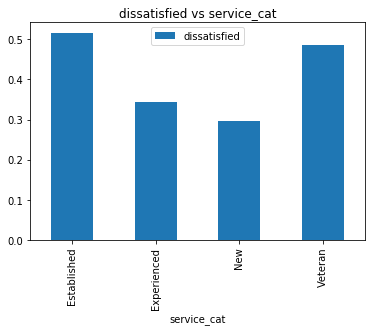

In [46]:
combined_updated['service_cat'].dropna(inplace = True)
pivot_combined_updated = combined_updated.pivot_table(values = 'dissatisfied', index = 'service_cat')
%matplotlib inline
import matplotlib.pyplot as plt
pivot_combined_updated.plot(kind = 'bar')
plt.title('dissatisfied vs service_cat')

Looking at the above bar plot, we find out that New and Experienced employees, who work in a shorter period of time, show less dissatisfaction than Established and Veteran with the longer service years.

Let's see how many people in each career stage resigned due to some kind of dissatisfaction.

In [47]:
grouped = combined_updated.groupby(['service_cat', 'dissatisfied'])['service_cat'].agg('count')
print(grouped)

service_cat  dissatisfied
Established  False            30
             True             32
Experienced  False           113
             True             59
New          False           136
             True             57
Veteran      False            70
             True             66
Name: service_cat, dtype: int64


The above data shows that Established and Veteran have almost the same amount for dissatisfied and satissfied but Expereinced and New show more amount for being satisfied and also resigned.

### Analyze Dissatisfaction based on Age

The second question of the project is mentioned her again:

- Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

Let's clean the age column and figure out how many people in each age group resgined due to some kind of dissatisfaction.

In [48]:
combined_updated['age'].value_counts(dropna = False)

51-55            71
NaN              55
41-45            48
41  45           45
46-50            42
36-40            41
46  50           39
26-30            35
21  25           33
26  30           32
36  40           32
31  35           32
21-25            29
31-35            29
56 or older      29
56-60            26
61 or older      23
20 or younger    10
Name: age, dtype: int64

It is possible to clean it by changing ranges for example '21  25' can be changed to '21-25', and also it is better to change '56-60' and '61 or older' to '56 or older'.

In [49]:
combined_updated['age'] = combined_updated['age'].str.replace(
    '  ', '-').str.replace('56-60', '56 or older').str.replace(
    '61 or older', '56 or older')
combined_updated['age'].value_counts(dropna = False).sort_index()

20 or younger    10
21-25            62
26-30            67
31-35            61
36-40            73
41-45            93
46-50            81
51-55            71
56 or older      78
NaN              55
Name: age, dtype: int64

Text(0.5, 1.0, 'dissatisfied vs age')

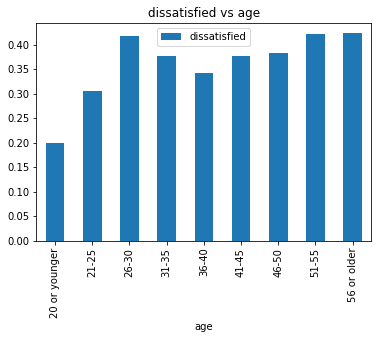

In [50]:
pv_age_dissatisfied = combined_updated.pivot_table(values = 'dissatisfied', index = 'age')
pv_age_dissatisfied.plot(kind = 'bar')
plt.title('dissatisfied vs age')

In [51]:
grouped_age = combined_updated.groupby(['age', 'dissatisfied'])['age'].agg('count')
print(grouped_age)

age            dissatisfied
20 or younger  False            8
               True             2
21-25          False           43
               True            19
26-30          False           39
               True            28
31-35          False           38
               True            23
36-40          False           48
               True            25
41-45          False           58
               True            35
46-50          False           50
               True            31
51-55          False           41
               True            30
56 or older    False           45
               True            33
Name: age, dtype: int64


The plot and information above show that the dissatisfaction of the resignated employees  are more in the range of 26-30 and above 50 years old. The dissatisfaction of the younger employees (under 25) is less than the older employees (older than 50). Even in the ranges with higher dissatisfaction, it is difficulat to say that the dissatisfaction caused resignation because less than 50% of resignating employees were dissatisfied. 

## DETE vs TAFE Analysis##
As the last step we are going to analyze dete and tafe surveys separately and see if there is any differenes between them.

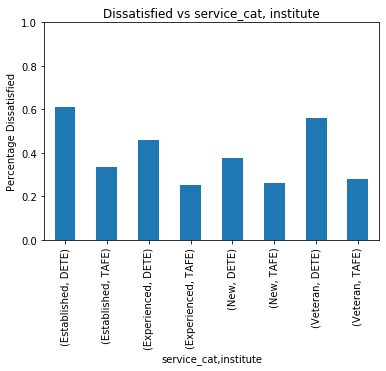

In [52]:
pv_service_institute = combined_updated.pivot_table(
    values = 'dissatisfied', index = ['service_cat', 'institute'])
ax = pv_service_institute.plot(kind = 'bar', legend = False)
ax.set_ylim(0, 1)
ax.set_ylabel("Percentage Dissatisfied")
plt.title('Dissatisfied vs service_cat, institute')
plt.show()

The highest dissatisfaction are in DETE Established and Veterans. More than 50 percent of them are dissatisfied that can cause the reasignations.
TAFE dissatisfaction is less than DETE in all categories and less than 35%  so we can not say that dissatisfaction is the reason of resignation in TAFE. 

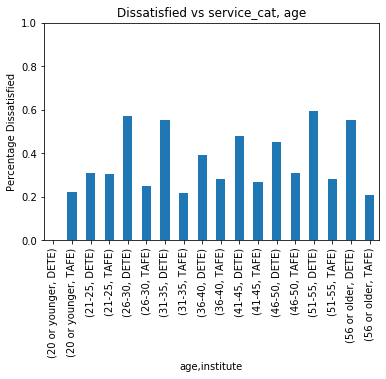

In [53]:
pv_age_institute = combined_updated.pivot_table(
    values = 'dissatisfied', index = ['age', 'institute'])
ax = pv_age_institute.plot(kind = 'bar', legend = False)
ax.set_ylim(0, 1)
ax.set_ylabel("Percentage Dissatisfied")
plt.title('Dissatisfied vs service_cat, age')
plt.show()

DETE older employees (more than 50) and the employees between 26 and 35 show dissatisfaction of higher than 50% which can be the cause of resignation.
Except for'20 or youner' employees which there is no record in DETE, for all ranges of ages DETE has more dissatisfaction than TAFE. Neither younger nor older TAFE employees resignation is due to some kind of dissatisfaction since the dissatisfied percentages are less than 35%.

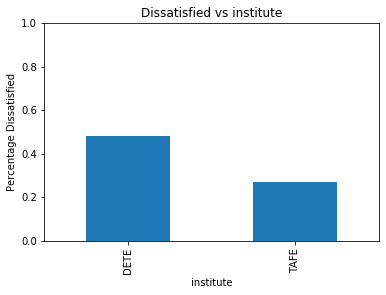

In [54]:
pv_institute = combined_updated.pivot_table(
    values = 'dissatisfied', index = 'institute')
ax = pv_institute.plot(kind = 'bar', legend = False)
ax.set_ylim(0, 1)
ax.set_ylabel("Percentage Dissatisfied")
plt.title('Dissatisfied vs institute')
plt.show()

The last plot demonstrates that DETE percentage of dissatisfaction is significantly higher than TAFE and we can say that resigning is due to dissatisfaction in DETE but not in TAFE.

## Conclusion##

In this project two data sets have been combined to get the answers to the following questions:

1. Are employees who only worked for the institutes for a short period of time resigning due to some kind of dissatisfaction? What about employees who have been there longer?
2. Are younger employees resigning due to some kind of dissatisfaction? What about older employees?

By cleaning data and analyzing them the following results have been acheived:

1. The employees with shorter period of servive show less dissatisfaction as the reason for their resignation rather than the employees with longer service period.
2. The resignated employees with the age of more than 50 and in the range of 26-30 have some kind of dissatisfaction more than the other age ranges. It is difficulat to say that the dissatisfaction caused resignation because less than 50% of resignating employees were dissatisfied.

Analyzing Dete and Tafe separatly shows that resigning is due to dissatisfaction in Dete but not Tafe. 
The dissatisfaction of these employees can cause resignation according to Dete survey:

- Employees with longer service period 
- Older employees plus employees between 26 and 30 years old 
